In [38]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df_f = pl.read_csv('main_factors.csv')
df_f.head()

DATE,ALPHA,ASIA,EU,US,BLUE,FINANCE,GREEN,RETAIL,TECH,GROWTH,MOMENTUM,VOLATILITY,YIELD
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""2023-05-21""",1.0,10.0,-1.0,1.0,-5.0,1.0,3.0,-4.0,-1.0,1.0,-7.0,-1.0,4.0
"""2023-05-22""",1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0,2.0,0.0,-1.0,0.0,1.0
"""2023-05-23""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""2023-05-24""",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0
"""2023-05-25""",1.0,-1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,2.0,1.0,0.0


In [40]:
def rsq(y1, y2):
    diff = y1 - y2
    SSresid = np.sum(diff**2)
    SStotal = len(y1) * np.var(y1)
    r2 = 1- SSresid/SStotal
    print(f"R-squared: {r2}")
    return r2

In [41]:
df = pl.read_csv('main_df.csv')
df.head()
df.sum()

DATE,ALPHA,R_ASIA,R_EU,R_US,S_BLUE,S_FINANCE,S_GREEN,S_RETAIL,S_TECH,GROWTH,MOMENTUM,VOLATILITY,YIELD,RETURN
str,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64
null,-367.238103,100349,100199,99452,59823,59952,60078,60078,60069,-536.275142,-447.028546,-172.959863,92.263946,57461.823798


### Note date

In [42]:
day = '2023-05-21'
one_day = df.filter(pl.col('DATE') == day)
one_day.head()
one_day.columns
one_day.mean()
one_day.sum()

DATE,ALPHA,R_ASIA,R_EU,R_US,S_BLUE,S_FINANCE,S_GREEN,S_RETAIL,S_TECH,GROWTH,MOMENTUM,VOLATILITY,YIELD,RETURN
str,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64
null,-17.923389,3332,3309,3359,1964,2067,1974,2011,1984,-44.766818,-19.876057,-122.616394,-20.374081,21628.562261


<Axes: >

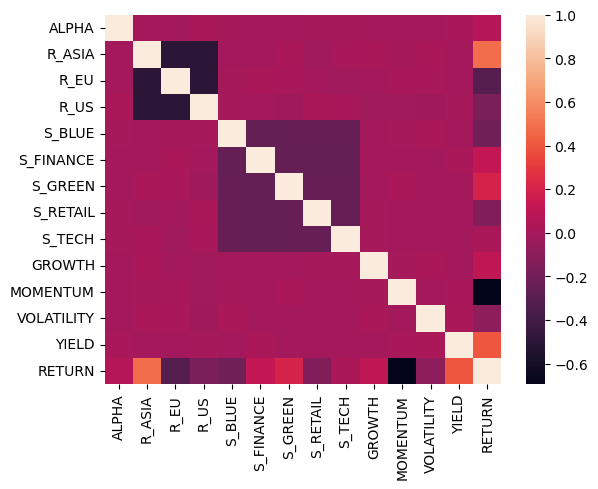

In [43]:
corr = one_day.drop(['DATE']).corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Setup Matrices

In [44]:
exclude = [
#                  'GROWTH',
#                  'MOMENTUM',
#                  'VOLATILITY',
#                  'YIELD',
#                  'R_ASIA',
#                  'R_AU',
                 'R_EU',
#                  'R_LATAM',
#                  'R_US',
#                  'S_BLUE',
#                  'S_FINANCE',
#                  'S_GREEN',
#                  'S_RETAIL',
#                  'S_TECH'
]

y_df = one_day[['RETURN']]
x_df = one_day.drop(['DATE', 'RETURN', 'ALPHA']+list(set(exclude) & set(one_day.columns)) ) 

# x = one_day.drop(['DATE', 'RETURN', 'ALPHA'
# #     ,'R_EU'   
# #     ,'R_US'
#  ]) 


x_df = x_df.hstack([pl.Series('ALPHA', np.ones(len(y_df)))])
x_df = pl.concat([ x_df[['ALPHA']], x_df.drop(['ALPHA']) ], how='horizontal')

xs = x_df.sum().to_numpy()
rs = y_df.sum().to_numpy()

display(x_df.head())
x = x_df.to_numpy()
y = y_df.to_numpy()

ALPHA,R_ASIA,R_US,S_BLUE,S_FINANCE,S_GREEN,S_RETAIL,S_TECH,GROWTH,MOMENTUM,VOLATILITY,YIELD
f64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64
1.0,1,0,0,1,0,0,0,-0.118844,-0.442826,0.048512,-0.509431
1.0,0,0,0,0,1,0,0,-0.35689,-0.387665,-1.160233,-0.285834
1.0,0,0,0,0,0,1,0,-0.066273,0.190383,-0.427118,1.877026
1.0,1,0,0,0,0,0,1,0.138358,-0.945388,-0.846304,-0.63404
1.0,0,1,1,0,0,0,0,-1.933958,-1.972134,0.649253,-0.839043


### Unconstrained

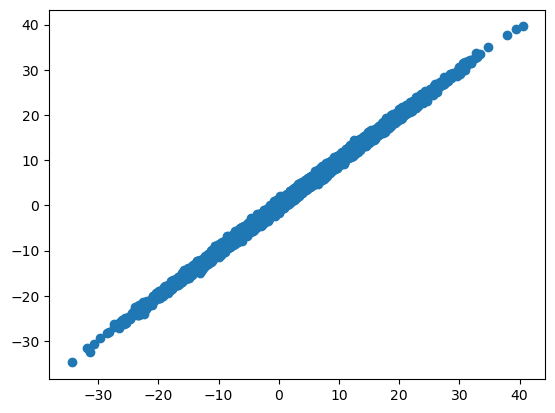

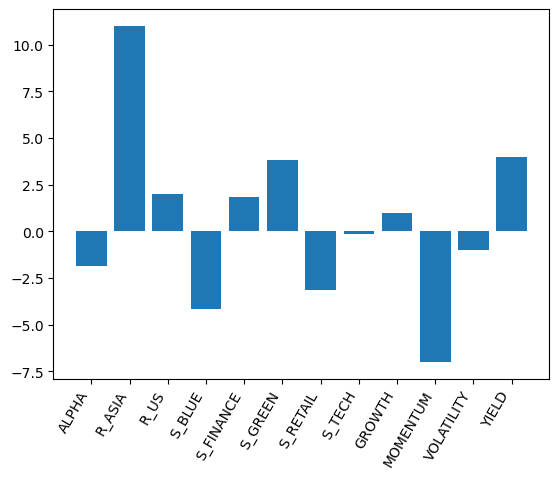

R-squared: 0.9974511011879543
[[-1.83987371]
 [11.00196852]
 [ 2.01615497]
 [-4.16376786]
 [ 1.82502911]
 [ 3.82946553]
 [-3.16282273]
 [-0.16777777]
 [ 0.99554535]
 [-7.00287625]
 [-1.00074707]
 [ 4.00543021]]


ALPHA,ASIA,EU,US,BLUE,FINANCE,GREEN,RETAIL,TECH,GROWTH,MOMENTUM,VOLATILITY,YIELD
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,10.0,-1.0,1.0,-5.0,1.0,3.0,-4.0,-1.0,1.0,-7.0,-1.0,4.0


In [49]:
XTX = np.dot(x.T, x)
XTY = np.dot(x.T, y)

F = np.linalg.pinv(XTX)@ XTY
# F = np.linalg.solve(XTX, XTY)
# F = np.linalg.lstsq(x, y, rcond=None); F=F[0]
# F = F * 10
yhat = np.matmul(x, F)
plt.scatter(y,yhat)
plt.show()

plt.bar(x_df.columns, F.reshape(len(F)),width=0.8)
plt.xticks(rotation=60, ha='right')
plt.show()


imd = df_f.filter(pl.col('DATE') == day).drop(['DATE'])
# imd = imd.extend(pl.DataFrame(F.T, schema=imd.columns))
# imd = imd.extend(pl.DataFrame(imd.to_numpy() - F.T, schema=imd.columns))

# plt.bar(imd.columns, imd.reshape(len(imd)),width=0.8)

rsq(y,yhat)
print(F)
imd

### Constraint LS
https://en.wikipedia.org/wiki/Ordinary_least_squares#Constrained_estimation

In [46]:
q = np.vstack([
    xs*[0,1,1,0,0,0,0,0,0,0,0,0,], #/ (xs*[]).sum(),
    xs*[0,0,0,1,1,1,1,1,0,0,0,0,] #/ (xs*[]).sum()
]).T
c = np.vstack([
              rs*[0],
              rs*[0]
])

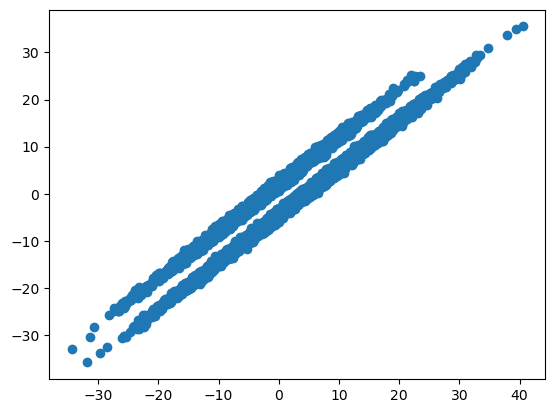

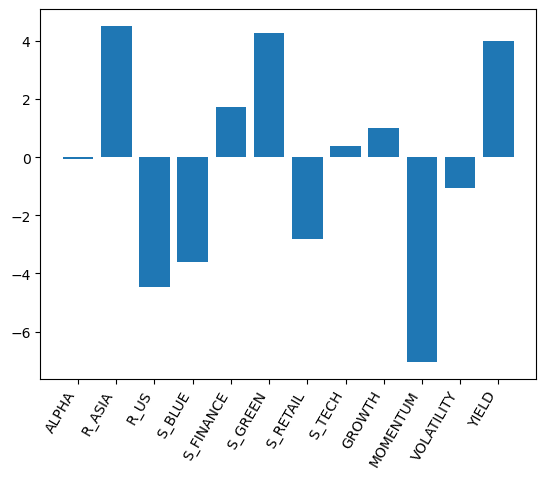

R-squared: 0.8530587000918537
[[-0.04865921]
 [ 4.51330191]
 [-4.4770235 ]
 [-3.61666836]
 [ 1.72494836]
 [ 4.28263338]
 [-2.81992103]
 [ 0.38034843]
 [ 0.99381875]
 [-7.04397865]
 [-1.05363816]
 [ 4.00751466]]


ALPHA,ASIA,EU,US,BLUE,FINANCE,GREEN,RETAIL,TECH,GROWTH,MOMENTUM,VOLATILITY,YIELD
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,10.0,-1.0,1.0,-5.0,1.0,3.0,-4.0,-1.0,1.0,-7.0,-1.0,4.0


In [47]:
yres = np.dot(q.T,b) - c
XTXinv = np.linalg.pinv(XTX)
z = np.linalg.pinv(q.T @ XTXinv @ q)
F = b - XTXinv @ q @  z @ yres

yhat = np.matmul(x, F)
plt.scatter(y,yhat)
plt.show()

plt.bar(x_df.columns, F.reshape(len(F)),width=0.8)
plt.xticks(rotation=60, ha='right')
plt.show()

imd = df_f.filter(pl.col('DATE') == day).drop(['DATE'])
# imd = imd.extend(pl.DataFrame(F.T, schema=imd.columns))
# imd = imd.extend(pl.DataFrame(imd.to_numpy() - F.T, schema=imd.columns))

rsq(y,yhat)
print(F)

imd


### Ridge

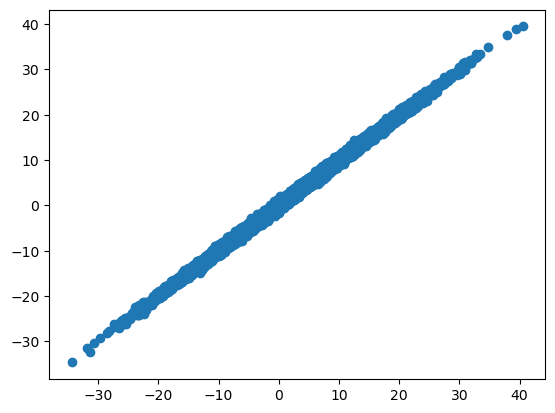

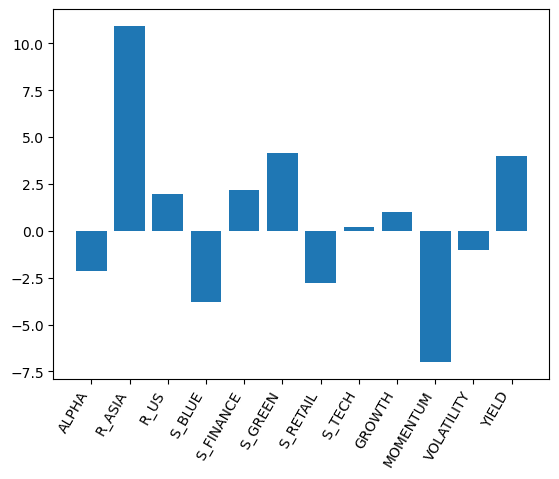

R-squared: 0.9974392849027439
[[-2.16866416]
 [10.93040196]
 [ 1.97074528]
 [-3.77701882]
 [ 2.18177453]
 [ 4.17609234]
 [-2.78099595]
 [ 0.2001479 ]
 [ 0.99471772]
 [-6.99585578]
 [-0.99985913]
 [ 4.00153015]]


ALPHA,ASIA,EU,US,BLUE,FINANCE,GREEN,RETAIL,TECH,GROWTH,MOMENTUM,VOLATILITY,YIELD
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,10.0,-1.0,1.0,-5.0,1.0,3.0,-4.0,-1.0,1.0,-7.0,-1.0,4.0


In [48]:
I = np.identity(len(x.T))
I[0][0] = 0

XTX = np.dot(x.T, x)
XTY = np.dot(x.T, y)

F = np.linalg.pinv(XTX + 10*I)@ XTY
# F = np.linalg.solve(XTX, XTY)
# F = np.linalg.lstsq(x, y, rcond=None); F=F[0]
# F = F * 10
yhat = np.matmul(x, F)
plt.scatter(y,yhat)
plt.show()

plt.bar(x_df.columns, F.reshape(len(F)),width=0.8)
plt.xticks(rotation=60, ha='right')
plt.show()


imd = df_f.filter(pl.col('DATE') == day).drop(['DATE'])
# imd = imd.extend(pl.DataFrame(F.T, schema=imd.columns))
# imd = imd.extend(pl.DataFrame(imd.to_numpy() - F.T, schema=imd.columns))

# plt.bar(imd.columns, imd.reshape(len(imd)),width=0.8)

rsq(y,yhat)
print(F)
imd

In [13]:
# https://towardsdatascience.com/beyond-linear-regression-467a7fc3bafb

In [14]:
one_day.head()

DATE,ALPHA,R_ASIA,R_EU,R_US,S_BLUE,S_FINANCE,S_GREEN,S_RETAIL,S_TECH,GROWTH,MOMENTUM,VOLATILITY,YIELD,RETURN
str,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64
"""2023-05-21""",0.120394,1,0,0,0,1,0,0,0,-0.118844,-0.442826,0.048512,-0.509431,12.015098
"""2023-05-21""",0.466741,0,1,0,0,0,1,0,0,-0.35689,-0.387665,-1.160233,-0.285834,4.8404
"""2023-05-21""",-0.811256,0,1,0,0,0,0,1,0,-0.066273,0.190383,-0.427118,1.877026,0.725009
"""2023-05-21""",0.070642,1,0,0,0,0,0,0,1,0.138358,-0.945388,-0.846304,-0.63404,14.13686
"""2023-05-21""",0.398148,0,0,1,1,0,0,0,0,-1.933958,-1.972134,0.649253,-0.839043,4.2637


In [16]:
# from celer import GroupLasso


# groups = [    
#     [0,8,9,10,11],
#     [1,2],
#     [3,4,5,6,7],
# #     []
# ]

# model = GroupLasso(groups=groups, alpha=.1)
# model.fit(x, y)

# print(model.intercept_)
# print(model.coef_)
# imd


[-1.85851637]
[ 0.         10.36195861  1.61462175 -3.51147758  2.02841806  3.87694155
 -2.58670256  0.19282053  0.98445715 -6.91599529 -0.99038564  3.95805395]


ALPHA,ASIA,EU,US,BLUE,FINANCE,GREEN,RETAIL,TECH,GROWTH,MOMENTUM,VOLATILITY,YIELD
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,10.0,-1.0,1.0,-5.0,1.0,3.0,-4.0,-1.0,1.0,-7.0,-1.0,4.0


In [ ]:
c_r = [z for z in one_day.columns if 'R_' in z]
c_s = [z for z in one_day.columns if 'S_' in z]

y = one_day[['RETURN']]
x = one_day[['R_ASIA', 'R_US']] 

x = x.hstack([pl.Series('ALPHA', np.ones(len(y)))])
x = pl.concat([ x[['ALPHA']], x.drop(['ALPHA']) ], how='horizontal')
xs = x.sum().to_numpy()
rs = y.sum().to_numpy()
display(x.head())
x = x.to_numpy()
y = y.to_numpy()

In [ ]:
XTX = np.dot(x.T, x)
XTY = np.dot(x.T, y)
b = np.linalg.pinv(XTX) @ XTY
print(b)
yhat = np.matmul(x, b)
plt.scatter(y,yhat)
rsq(y,yhat)
imd = df_f.filter(pl.col('DATE') == day).drop(['DATE'])
imd